In [436]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
%matplotlib inline
warnings.simplefilter("ignore")


from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import train_test_split

import joblib

In [404]:
df = pd.read_csv('final_test.csv')

df.head()

,weight,age,height,size
0,62,28.0,172.72,XL
1,59,36.0,167.64,L
2,61,34.0,165.10,M
3,65,27.0,175.26,L
4,62,45.0,172.72,M


In [405]:
df['size'].value_counts()

size
M       29712
S       21924
XXXL    21359
XL      19119
L       17587
XXS      9964
XXL        69
Name: count, dtype: int64

<Axes: xlabel='size', ylabel='count'>

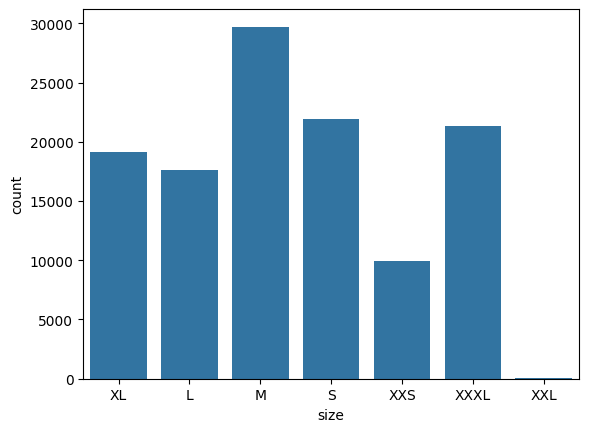

In [406]:
sns.countplot(x=df["size"])

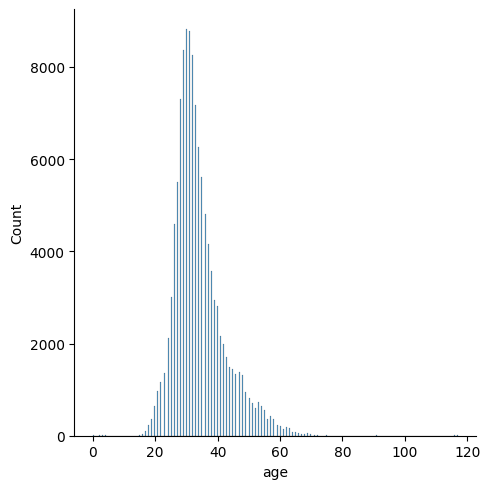

In [407]:
sns.displot(df["age"])
plt.show()

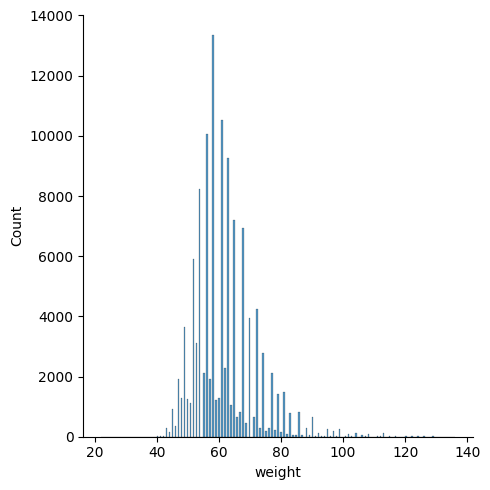

In [408]:
sns.displot(df["weight"])
plt.show()

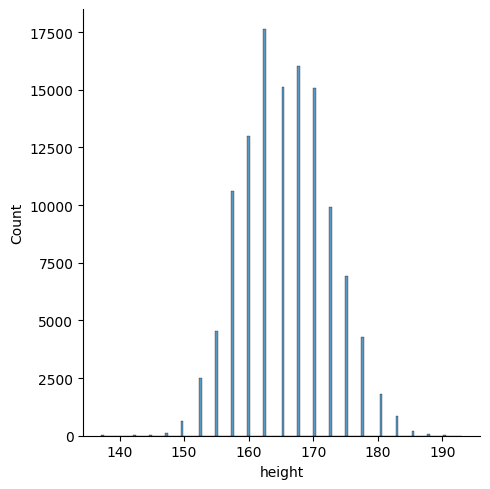

In [409]:
sns.displot(df["height"])
plt.show()

In [410]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119734 entries, 0 to 119733
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   weight  119734 non-null  int64  
 1   age     119477 non-null  float64
 2   height  119404 non-null  float64
 3   size    119734 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 3.7+ MB


In [411]:
df.describe()

,weight,age,height
count,119734.000000,119477.000000,119404.000000
mean,61.756811,34.027311,165.805794
std,9.944863,8.149447,6.737651
min,22.000000,0.000000,137.160000
25%,55.000000,29.000000,160.020000
50%,61.000000,32.000000,165.100000
75%,67.000000,37.000000,170.180000
max,136.000000,117.000000,193.040000


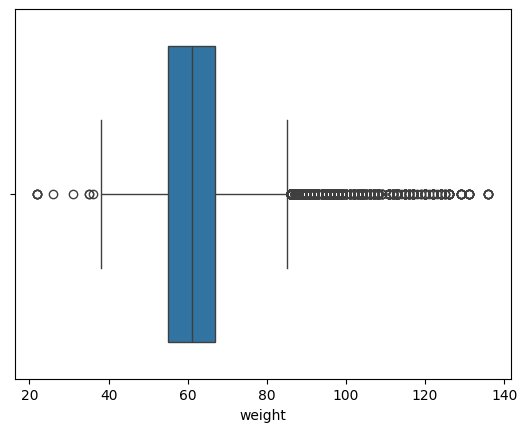

In [412]:
sns.boxplot(x='weight',data=df)
plt.show()

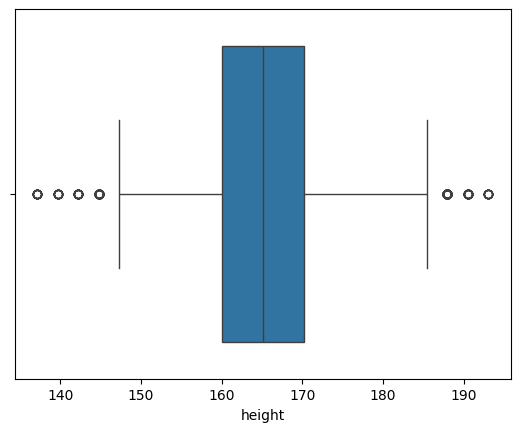

In [413]:
sns.boxplot(x='height',data=df)
plt.show()

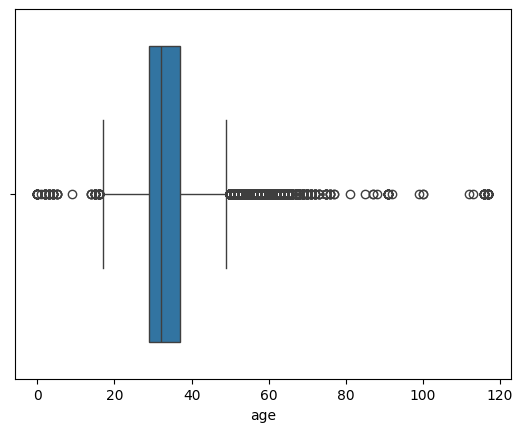

In [414]:
sns.boxplot(x='age',data=df)
plt.show()

In [415]:
q1 = df['age'].quantile(0.25)
q3 = df['age'].quantile(0.75)

iqr = q3 - q1

lb = q1 - 1.5 * iqr
ub = q3 + 1.5 * iqr

df = df[(df['age']>=lb)&(df['age']<=ub)]

In [416]:
q1 = df['weight'].quantile(0.25)
q3 = df['weight'].quantile(0.75)

iqr = q3 - q1

lb = q1 - 1.5 * iqr
ub = q3 + 1.5 * iqr

df = df[(df['weight']>=lb)&(df['weight']<=ub)]

In [417]:
q1 = df['height'].quantile(0.25)
q3 = df['height'].quantile(0.75)

iqr = q3 - q1

lb = q1 - 1.5 * iqr
ub = q3 + 1.5 * iqr

df = df[(df['height']>=lb)&(df['height']<=ub)]

In [418]:
df

,weight,age,height,size
0,62,28.0,172.72,XL
1,59,36.0,167.64,L
2,61,34.0,165.10,M
3,65,27.0,175.26,L
4,62,45.0,172.72,M
...,...,...,...,...
119729,63,42.0,175.26,M
119730,45,29.0,154.94,S
119731,61,31.0,172.72,M
119732,74,31.0,167.64,XL


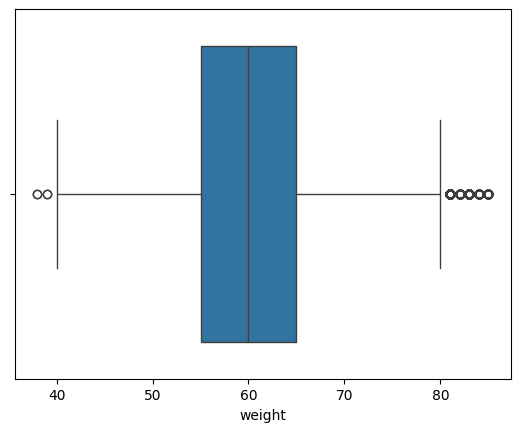

In [419]:
sns.boxplot(x='weight',data=df)
plt.show()

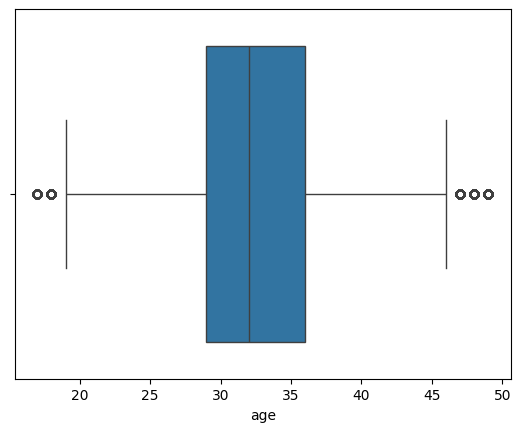

In [420]:
sns.boxplot(x='age',data=df)
plt.show()

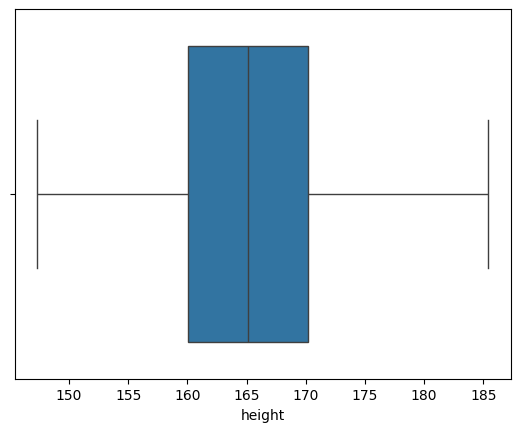

In [421]:
sns.boxplot(x='height',data=df)
plt.show()

In [422]:
df.isna().sum()

weight    0
age       0
height    0
size      0
dtype: int64

In [423]:
df['size'].unique()

array(['XL', 'L', 'M', 'S', 'XXS', 'XXXL', 'XXL'], dtype=object)

In [424]:
df['size'] = df['size'].map({
        "XXS": 1,
        "S": 2,
        "M": 3,
        "L": 4,
        "XL": 5,
        "XXL": 6,
        "XXXL": 7
})

In [425]:
df

,weight,age,height,size
0,62,28.0,172.72,5
1,59,36.0,167.64,4
2,61,34.0,165.10,3
3,65,27.0,175.26,4
4,62,45.0,172.72,3
...,...,...,...,...
119729,63,42.0,175.26,3
119730,45,29.0,154.94,2
119731,61,31.0,172.72,3
119732,74,31.0,167.64,5


In [426]:
df

,weight,age,height,size
0,62,28.0,172.72,5
1,59,36.0,167.64,4
2,61,34.0,165.10,3
3,65,27.0,175.26,4
4,62,45.0,172.72,3
...,...,...,...,...
119729,63,42.0,175.26,3
119730,45,29.0,154.94,2
119731,61,31.0,172.72,3
119732,74,31.0,167.64,5


In [427]:
x = df.drop(columns='size')
y = df[['size']]

In [428]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [429]:
lnr = LinearRegression()
dtr = DecisionTreeRegressor()
(lnr.fit(X_train,y_train),dtr.fit(X_train,y_train))

(LinearRegression(), DecisionTreeRegressor())

In [430]:
print('LNR ,Training:',lnr.score(X_train,y_train)*100,' Testing:',lnr.score(X_test,y_test)*100)
print('DTR ,Training:',dtr.score(X_train,y_train)*100,' Testing:',dtr.score(X_test,y_test)*100)


LNR ,Training: 68.72785070739779  Testing: 68.67837734528575
DTR ,Training: 75.2763596007465  Testing: 68.7197849147228


In [431]:
rdr = RandomForestRegressor(min_samples_leaf=4)
rdr.fit(X_train,y_train)

print('RDR ,Training:',rdr.score(X_train,y_train)*100,' Testing:',rdr.score(X_test,y_test)*100)

RDR ,Training: 74.00691093929336  Testing: 70.42803731224566


In [432]:
pred = rdr.predict(X_test)

y_test['rdr'] = pred
y_test['lnr'] = lnr.predict(X_test)
y_test

,size,rdr,lnr
989,5,5.286928,5.298081
108804,1,1.875165,2.259109
98896,5,4.530387,3.597182
83133,2,2.806630,2.666336
101367,7,6.247243,5.636886
...,...,...,...
83132,1,1.808199,1.927554
3658,5,6.281581,5.902663
99246,5,4.107993,4.120588
36993,2,2.149657,2.342930


In [433]:
y_test['lnr'] = y_test['lnr'].round()
y_test['rdr'] = y_test['rdr'].round()

In [435]:
y_test.head(40)

,size,rdr,lnr
989,5,5.0,5.0
108804,1,2.0,2.0
98896,5,5.0,4.0
83133,2,3.0,3.0
101367,7,6.0,6.0
14502,4,4.0,4.0
71242,5,4.0,4.0
18745,7,5.0,5.0
95105,3,6.0,4.0
37946,2,3.0,3.0


In [437]:
joblib.dump(rdr,'randomforest_Regression.lb')

['randomforest_Regression.lb']